In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
##loading the data
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8356 files belonging to 18 classes.


In [31]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [33]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [35]:
##Visualising and performing Prediction

In [39]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.3/38.8 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.7/38.8 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 1.0/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.8 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.8 MB 5.4 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.8 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.8 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.8/38.8 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 1.9/38.8 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/38.8 MB 4.6 MB/s eta 0:00:08
   -- ------------------------------------- 2.4/38.8 MB 4.5 MB/s eta 0:00:09
   -- 

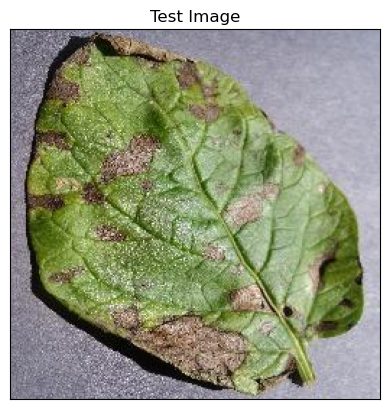

In [79]:
#Test Image Visualization
import cv2
image_path = 'test/PotatoEarlyBlight1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [81]:
#testing model

In [83]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [85]:
print(predictions)

[[5.2730924e-11 2.7805249e-09 4.5252399e-11 4.1842469e-14 3.9288643e-09
  2.7949249e-12 3.8340525e-10 2.3230511e-13 5.0455315e-09 1.4712424e-14
  5.4138707e-09 2.3363074e-12 9.9997151e-01 1.6998133e-10 2.8454073e-05
  8.0223788e-12 5.0901780e-13 1.1597342e-09]]


In [87]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

12


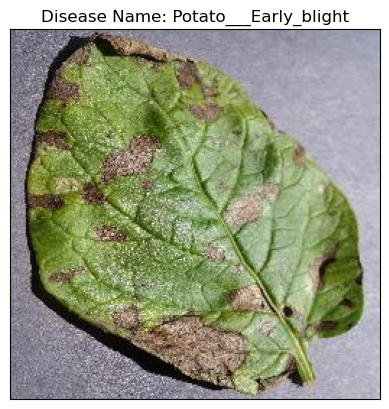

In [89]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

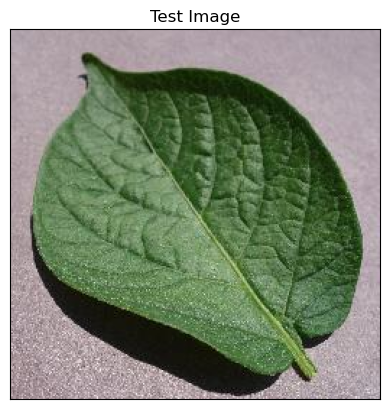

In [107]:
image_path1 = 'test/PotatoHealthy1.JPG'
# Reading an image in default mode
img1 = cv2.imread(image_path1)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img1)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [109]:
image1 = tf.keras.preprocessing.image.load_img(image_path1,target_size=(128,128))
input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
input_arr1 = np.array([input_arr1])  # Convert single image to a batch.
predictions1 = cnn.predict(input_arr1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [111]:
print(predictions1)

[[1.8546177e-06 1.4434243e-03 8.6648407e-04 7.7101984e-05 5.1220155e-07
  2.3715073e-07 5.4482703e-06 6.3595180e-06 5.1965449e-06 6.2288728e-07
  6.4744558e-03 1.4142785e-04 1.6378749e-02 9.5423770e-01 8.1198723e-06
  2.0329978e-02 8.8196595e-07 2.1409263e-05]]


In [113]:
result_index1 = np.argmax(predictions1) #Return index of max element
print(result_index1)

13


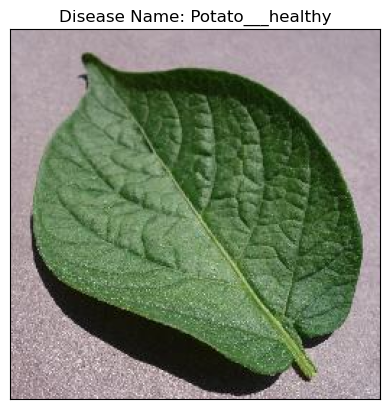

In [115]:
model_prediction1 = class_name[result_index1]
plt.imshow(img1)
plt.title(f"Disease Name: {model_prediction1}")
plt.xticks([])
plt.yticks([])
plt.show()